In [2]:
from math import floor
import heapq
import functools
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
DATASET = 'data/1.csv' 

## FUNCTIONS

In [199]:
# spocitani celkove vahy minimalnistry grafu pro ucely testovani
def count_minimum_spanning_tree_weight(tree):
    count = 0
    for edge in tree:
        count += int(edge[0])
    return count

# nacteni datasetu z @filepath
def load_dataset(filepath):
    vertices = set()
    graph = {
        'edges':set([]),
        'vertices':set([]),
    }
    try:
        f = open(filepath, "r")
        for x in f:
            x = x.replace(' ', '')
            split_line = x.split(',')
            split_line[2] = split_line[2].replace('\n', '')
            graph['edges'].add((int(split_line[2]),split_line[1],split_line[0]))
            graph['vertices'].add(split_line[0])
            graph['vertices'].add(split_line[1])
        f.close()
        return graph
    except:
        return -1


# prihradkove razeni nad @graph
def bucket_sort(graph):
    edges = graph['edges']
    max_value = max(edges)[0]
    bucket_size = max_value / len(edges)

    buckets = []
    for _ in edges:
        buckets.append([])

    for edge in edges:
        if int(edge[0] / bucket_size) == len(buckets):
            buckets[int(edge[0] / bucket_size)-1].append(edge)
        else:
            buckets[int(edge[0] / bucket_size)].append(edge)
    for bucket in buckets:
        sorted(bucket)
    return(buckets)

# nalezeni neprazdne prihradky od indexu @index
def find_non_empty_bucket(buckets, index):
    for i in range(index, len(buckets)):
        if len(buckets[i]) != 0:
            return i, buckets[i]
    return -1

In [125]:
# funkce pro vypis casu spusteni dvou metod pomoci magic module %timeit
def time_execution(DATASET):
    # pro asserty
    tree1 = alternative_kruskal(load_dataset(DATASET))
    tree2 = og_kruskal(load_dataset(DATASET))

    print("Asserting minimum spanning trees...")
    assert(len(tree1) == len(tree2))
    assert(count_minimum_spanning_tree_weight(tree1) == count_minimum_spanning_tree_weight(tree2))
    assert(find_vertices_in_tree(tree1) == find_vertices_in_tree(tree2))
    print("Assert passed. Executing...\n")

    print("Time of execution of my kruskal implementation on the dataset '{}'".format(DATASET))
    alt_time = %timeit alternative_kruskal(load_dataset(DATASET))

    print("-----------------------------------------------------------------------")

    print("Timing of the original kruskal implementation on the dataset {}".format(DATASET))
    og_time = %timeit og_kruskal(load_dataset(DATASET))

In [195]:
parent = dict()
rank = dict()

# funkce find pro union & find
def find(vertice):
    if parent[vertice] != vertice:
        parent[vertice] = find(parent[vertice])
    return parent[vertice]

# funkce union pro union & find
def union(vertice1, vertice2):
    root1 = find(vertice1)
    root2 = find(vertice2)
    if root1 != root2:
        if rank[root1] > rank[root2]:
            parent[root2] = root1
        else:
            parent[root1] = root2
            if rank[root1] == rank[root2]: rank[root2] += 1

# ma alternativni implementace kruskalova algoritmu
def alternative_kruskal(graph):

    # vytvareni setu pro kazdy vrchol
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    # index intervalu prihradky 
    j = 0

    # min halda
    h = []

    # vytvoreni prihradek
    buckets = bucket_sort(graph)
    while len(minimum_spanning_tree) < len(graph['vertices']) - 1:
        if(len(h) == 0):
            index_and_bucket = find_non_empty_bucket(buckets, j)
            empty_bucket = index_and_bucket[1]
            j = index_and_bucket[0]
            # pridani obsahu prihradky na haldu
            for val in empty_bucket:
                heapq.heappush(h, val)
        # nalezeni a vymazani hrany s danym ohodnocenim
        #edge = find_and_remove_edge(graph, min(h))

        #edge = min(h)
        # vymazani hrany z haldy
        edge = heapq.heappop(h)

        # vynulovani prazdne prihradky
        if len(h) == 0:
            buckets[j] = []
        
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            minimum_spanning_tree.add(edge)
            union(vertice1, vertice2)

    return minimum_spanning_tree

# originalni implementace s vyuzitim union & find od israelst (https://github.com/israelst/Algorithms-Book--Python/blob/master/5-Greedy-algorithms/kruskal.py)
def og_kruskal(graph):
    for vertice in graph['vertices']:
        make_set(vertice)

    minimum_spanning_tree = set()
    edges = list(graph['edges'])
    edges.sort()
    for edge in edges:        
    
        weight, vertice1, vertice2 = edge
        if find(vertice1) != find(vertice2):
            union(vertice1, vertice2)
            minimum_spanning_tree.add(edge)

    return minimum_spanning_tree

## Time execution experiments

	Weight distribution graph of the dataset '1.csv'


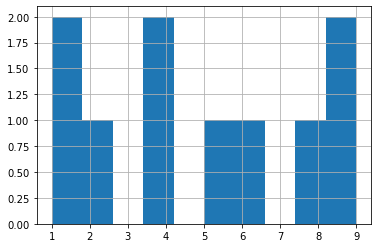

In [197]:
DATASET = 'data/1.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['7'].hist();

In [198]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/1.csv'
193 µs ± 7.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/1.csv
163 µs ± 828 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


	Weight distribution graph of the dataset '2.csv'


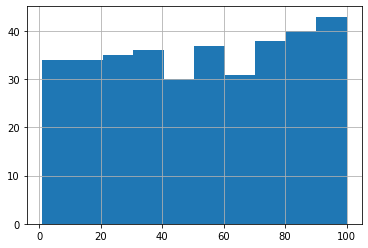

In [200]:
DATASET = 'data/2.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['46'].hist();

In [201]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/2.csv'
1.55 ms ± 7.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/2.csv
1.23 ms ± 3.41 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


	Weight distribution graph of the dataset '3.csv'


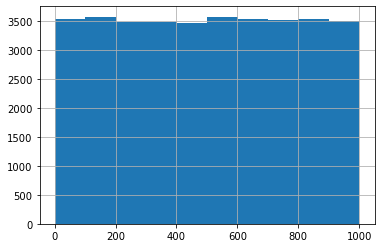

In [202]:
DATASET = 'data/3.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['809'].hist();

In [203]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/3.csv'
116 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/3.csv
134 ms ± 1.74 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


	Weight distribution graph of the dataset '4_new.csv'


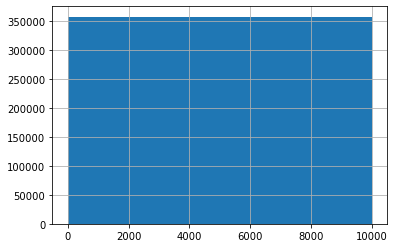

In [211]:
DATASET = 'data/4_new.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['170'].hist();

In [213]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/4_new.csv'
17.8 s ± 44.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/4_new.csv
27.9 s ± 189 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


	Weight distribution graph of the dataset '4_new_2.csv'


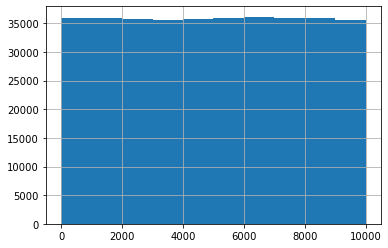

In [207]:
DATASET = 'data/4_new_2.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['7625'].hist();

In [208]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/4_new_2.csv'
1.53 s ± 29.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/4_new_2.csv
2.04 s ± 31.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


	Weight distribution graph of the dataset '5.csv'


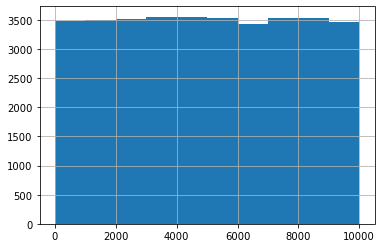

In [134]:
DATASET = 'data/5.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['1058'].hist();

In [135]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/5.csv'
7.3 s ± 1.03 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/5.csv
133 ms ± 1.75 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


	Weight distribution graph of the dataset '6.csv'


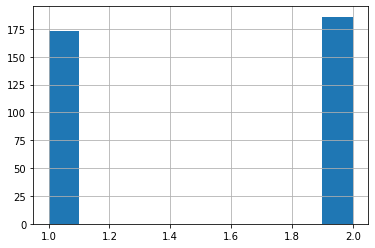

In [136]:
DATASET = 'data/6.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['1.1'].hist();

In [137]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/6.csv'
2.91 ms ± 107 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/6.csv
1.3 ms ± 11.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


	Weight distribution graph of the dataset '7.csv'


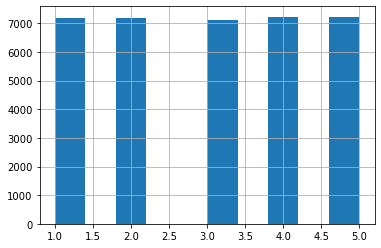

In [138]:
DATASET = 'data/7.csv' 
print("\tWeight distribution graph of the dataset '{}'".format(DATASET.split('/')[1]))
pd.read_csv(DATASET)['4'].hist();

In [139]:
time_execution(DATASET)

Asserting minimum spanning trees...
Assert passed. Executing...

Time of execution of my kruskal implementation on the dataset 'data/7.csv'
2.01 s ± 17 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
-----------------------------------------------------------------------
Timing of the original kruskal implementation on the dataset data/7.csv
140 ms ± 2.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
